In [1]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('insurance.csv')
print(df.head())

   age     sex     bmi  children smoker     region      charges
0   19  female  27.900         0    yes  southwest  16884.92400
1   18    male  33.770         1     no  southeast   1725.55230
2   28    male  33.000         3     no  southeast   4449.46200
3   33    male  22.705         0     no  northwest  21984.47061
4   32    male  28.880         0     no  northwest   3866.85520


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


 ## Compute and display summary statistics for each feature available in the dataset. 
 (e.g.minimum value, maximum value, mean, range, standard deviation, variance and percentiles)

In [18]:
df.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [5]:
df.min()

age                18
sex            female
bmi             15.96
children            0
smoker             no
region      northeast
charges     1121.8739
dtype: object

In [6]:
df.max()

age                  64
sex                male
bmi               53.13
children              5
smoker              yes
region        southwest
charges     63770.42801
dtype: object

In [12]:
numeric_df = df.select_dtypes(include='number')

In [14]:
summary = df.describe()

range_values = numeric_df.max() - numeric_df.min()
print("Range for each numeric column:\n")
print(range_values)

Range for each numeric column:

age            46.00000
bmi            37.17000
children        5.00000
charges     62648.55411
dtype: float64


In [15]:
variance = numeric_df.var()
print("Variance of the each numeric column:\n")
print(variance)

Variance of the each numeric column:

age         1.974014e+02
bmi         3.718788e+01
children    1.453213e+00
charges     1.466524e+08
dtype: float64


In [17]:
numeric_df.std()

age            14.049960
bmi             6.098187
children        1.205493
charges     12110.011237
dtype: float64

In [ ]:
numeric_df.quantile([0.25,0.50,0.75])

,age,bmi,children,charges
0.25,27.0,26.29625,0.0,4740.287150
0.50,39.0,30.40000,1.0,9382.033000
0.75,51.0,34.69375,2.0,16639.912515


## Data Visualization -Ploting

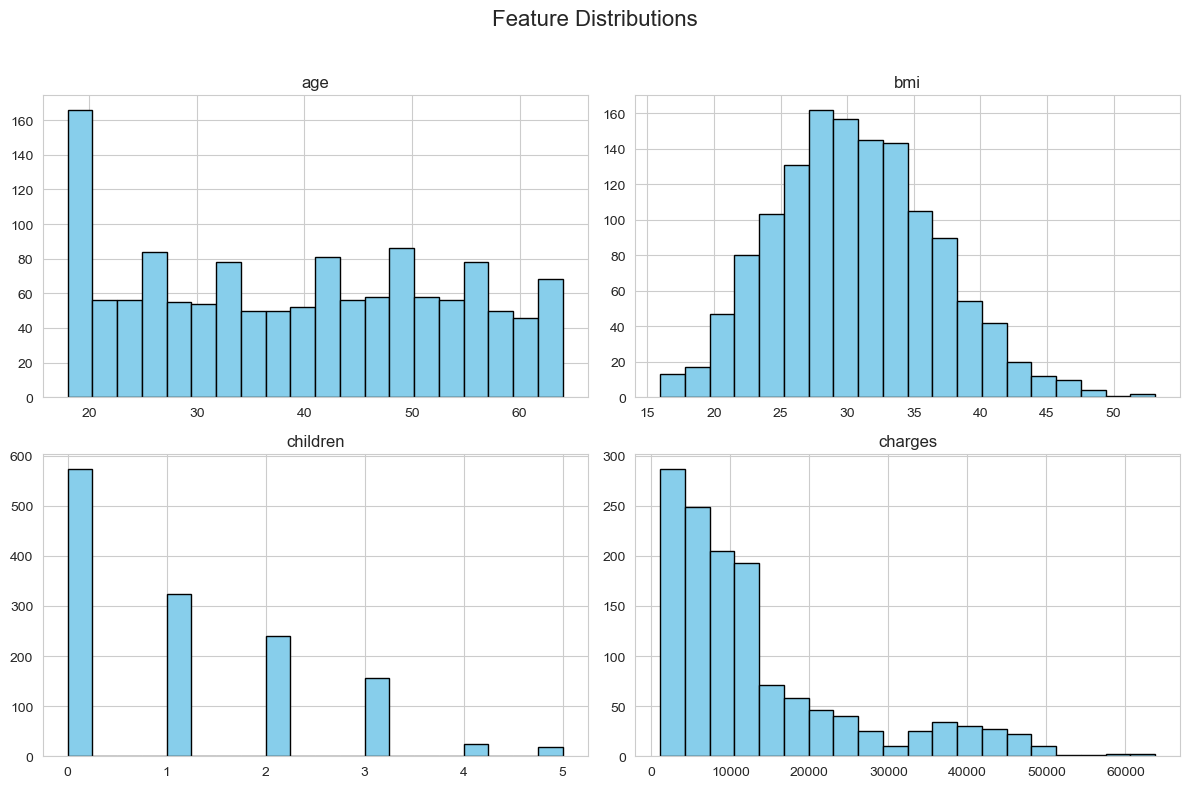

In [ ]:
# histograms for each feature
sns.set_style("whitegrid")
df.hist(figsize=(12, 8), bins=20, color='skyblue', edgecolor='black')
plt.suptitle("Feature Distributions", fontsize=16)
plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()

## Data cleaning

In [29]:
df.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [30]:
df.drop_duplicates(inplace=True)

<Axes: xlabel='bmi'>

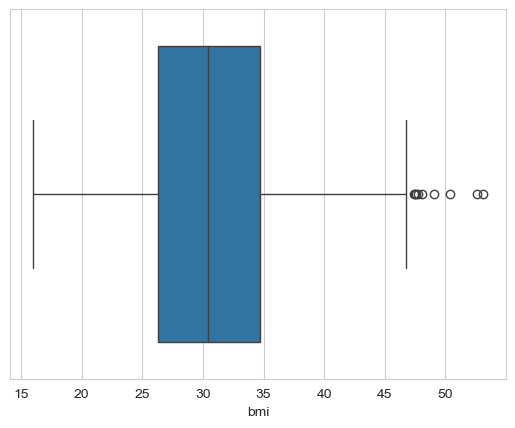

In [ ]:
sns.boxplot(x=df['bmi']) 
sns.boxplot(x=df)


In [35]:
numeric_cols = df.select_dtypes(include='number').columns

for col in numeric_cols:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR

    outliers = df[(df[col] < lower) | (df[col] > upper)]
    print(f"\n📌 Outliers in '{col}' ({len(outliers)} rows):")
    print(outliers[[col]])




📌 Outliers in 'age' (0 rows):
Empty DataFrame
Columns: [age]
Index: []

📌 Outliers in 'bmi' (9 rows):
        bmi
116   49.06
286   48.07
401   47.52
543   47.41
847   50.38
860   47.60
1047  52.58
1088  47.74
1317  53.13

📌 Outliers in 'children' (0 rows):
Empty DataFrame
Columns: [children]
Index: []

📌 Outliers in 'charges' (139 rows):
          charges
14    39611.75770
19    36837.46700
23    37701.87680
29    38711.00000
30    35585.57600
...           ...
1300  62592.87309
1301  46718.16325
1303  37829.72420
1313  36397.57600
1323  43896.37630

[139 rows x 1 columns]


In [38]:
Q1_bmi = df['bmi'].quantile(0.25)
Q3_bmi = df['bmi'].quantile(0.75)
IQR_bmi = Q3_bmi - Q1_bmi
lower_bmi = Q1_bmi - 1.5 * IQR_bmi
upper_bmi = Q3_bmi + 1.5 * IQR_bmi

df = df[(df['bmi'] >= lower_bmi) & (df['bmi'] <= upper_bmi)]

<Axes: xlabel='bmi'>

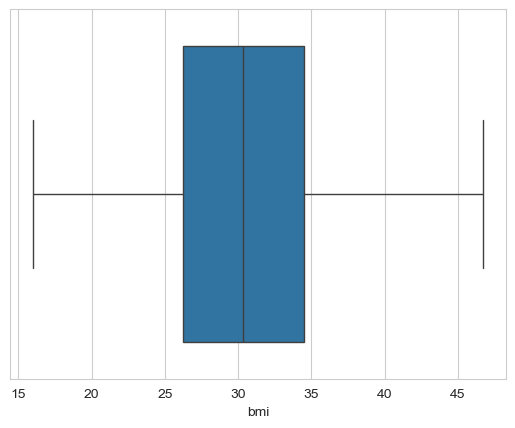

In [40]:
sns.boxplot(x=df['bmi']) 


## Data Transforming,Model Training and Evaluation

In [41]:
data_encoded = pd.get_dummies(df, drop_first=True)

In [42]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix

In [44]:
data_encoded['smoker_yes'] = df['smoker'].map({'yes': 1, 'no': 0})

In [45]:
X = data_encoded.drop(columns=['smoker_yes'])
y = data_encoded['smoker_yes']

In [46]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [47]:
model = RandomForestClassifier()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

In [48]:
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[205  11]
 [  1  49]]
              precision    recall  f1-score   support

           0       1.00      0.95      0.97       216
           1       0.82      0.98      0.89        50

    accuracy                           0.95       266
   macro avg       0.91      0.96      0.93       266
weighted avg       0.96      0.95      0.96       266

